### Import Required Package

In [ ]:
## pip install pandas_datareader

### Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import pandas_datareader as web
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error

### Load the Bitcoin USD Data from "Yahoo Finance"

In [2]:
crypto_currency = 'BTC'
against_currency = 'USD'

start = dt.datetime(2021,1,2)
end = dt.datetime(2022,9,30)

## BTC data from Jan 1, 2021 to Sept 30, 2022
bitcoin_data = web.DataReader(f'{crypto_currency}-{against_currency}','yahoo',start,end)
print(bitcoin_data)


                    High           Low          Open         Close  \
Date                                                                 
2021-01-01  29600.626953  28803.585938  28994.009766  29374.152344   
2021-01-02  33155.117188  29091.181641  29376.455078  32127.267578   
2021-01-03  34608.558594  32052.316406  32129.408203  32782.023438   
2021-01-04  33440.218750  28722.755859  32810.949219  31971.914062   
2021-01-05  34437.589844  30221.187500  31977.041016  33992.429688   
...                  ...           ...           ...           ...   
2022-09-26  19274.873047  18721.285156  18803.900391  19222.671875   
2022-09-27  20338.455078  18915.667969  19221.839844  19110.546875   
2022-09-28  19688.343750  18553.296875  19104.621094  19426.720703   
2022-09-29  19589.265625  18924.353516  19427.779297  19573.050781   
2022-09-30  20109.849609  19265.662109  19573.431641  19431.789062   

                 Volume     Adj Close  
Date                                   
2021-01-0

### Data visualization

Text(0.5, 1.0, 'Bitcoin Closing Price Distribution')

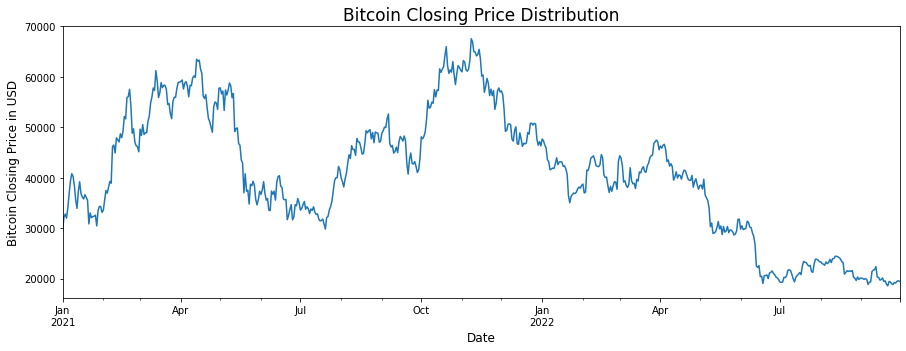

In [3]:
# Ploting the Bitcoin Closing Price distribution over time

bitcoin_data['Close'].plot(figsize =(15,5))
plt.xlabel("Date",fontsize=12)
plt.ylabel("Bitcoin Closing Price in USD", fontsize=12)
plt.title("Bitcoin Closing Price Distribution", fontsize=17)

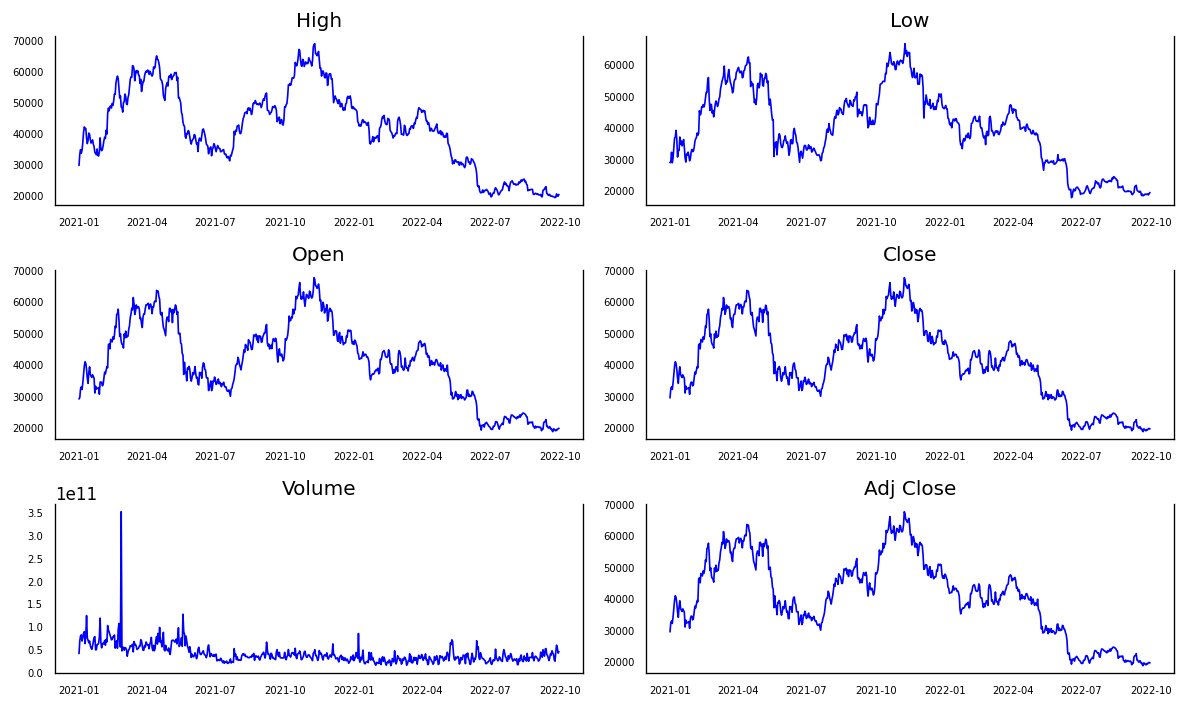

In [4]:
## data features plot

fig, axes = plt.subplots(nrows=3, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = bitcoin_data[bitcoin_data.columns[i]]
    ax.plot(data, color='blue', linewidth=1)
    # Decorations
    ax.set_title(bitcoin_data.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

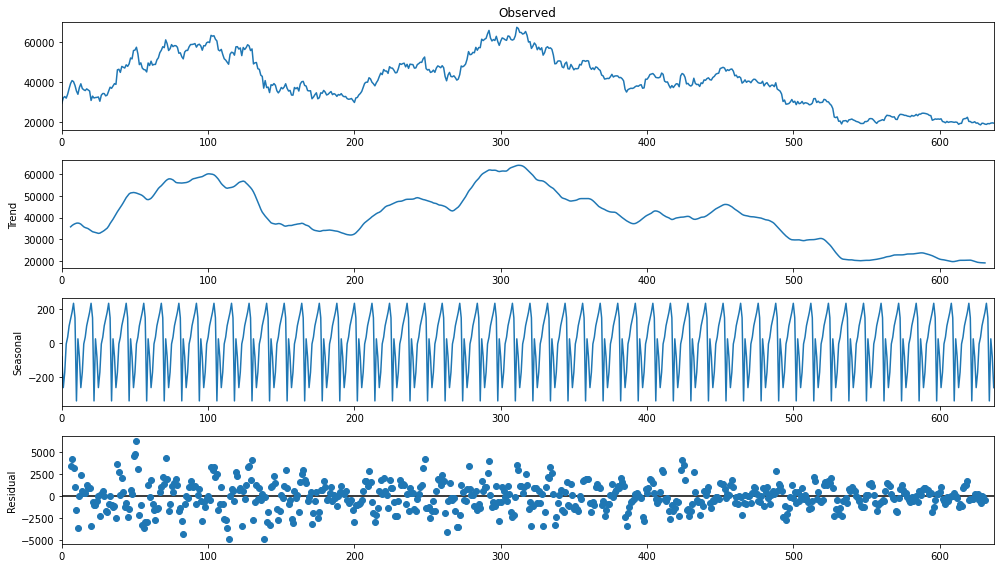

In [4]:
## **Decomposition - Time Series Components**
### Additive:  y(t) = Level + Trend + Seasonality + Noise
### Multiplicative: y(t) = Level * Trend * Seasonality * Noise

from statsmodels.tsa.seasonal import seasonal_decompose
series = list(bitcoin_data['Close'])
result = seasonal_decompose(series, model='additive', period=12)

fig = result.plot()
fig.set_size_inches((14, 8))
fig.tight_layout()
plt.show()

## here "Observed" value = "Trend" + "Seasonal" + "Residual"

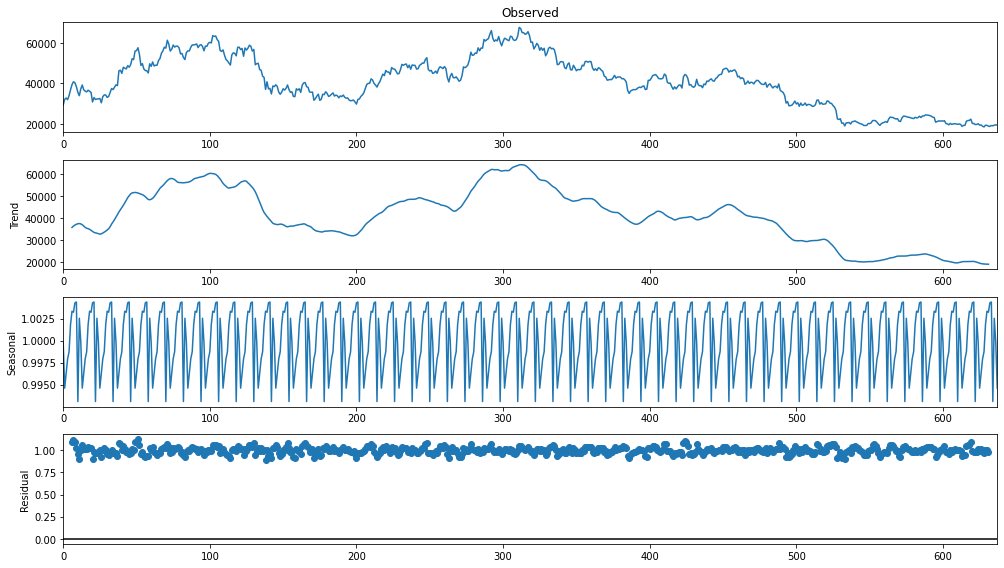

In [5]:
series = list(bitcoin_data['Close'])
result = seasonal_decompose(series, model='multiplicative', period=12)

fig = result.plot()
fig.set_size_inches((14, 8))
fig.tight_layout()
plt.show()

- "Additive" model fits better than "Multiplicative" beacause in Multiplicative, residual error is on high side and constant (close to 1)

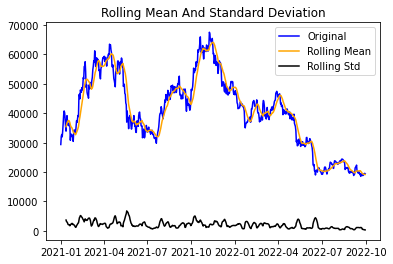

Results of Dickey-fuller test:
Test Statistic                  -1.328782
p-value                          0.615904
#Lags Used                       0.000000
Number of Observations Used    637.000000
Critical Value (1%)             -3.440657
Critical Value (5%)             -2.866088
Critical Value (10%)            -2.569192
dtype: float64


In [7]:
## Data Stationarity Check
#### ADCF Test 

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistic:
    movingAverage = timeseries.rolling(window=12).mean()
    movingstd = timeseries.rolling(window=12).std()
    
    #Plot rolling statistic:
    orig = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(movingAverage, color = 'orange', label = 'Rolling Mean')
    std = plt.plot(movingstd, color = 'black', label = 'Rolling Std')
    plt.title('Rolling Mean And Standard Deviation')
    plt.legend(loc = 'best')
    plt.show(block = False)
    
    # Perform Dickey-fuller test:
    print('Results of Dickey-fuller test:')
    dftest = adfuller(bitcoin_data['Close'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
test_stationarity(bitcoin_data['Close'])

### Train Test Data Split

In [17]:
## Train Data (Jan 2021 to Aug 2022) and Test Data (Sept 2022)

train_data = list(bitcoin_data[:-30]['Close'])
test_data = list(bitcoin_data[-30:]['Close'])

training_data = bitcoin_data[:-30]['Close']
testing_data = bitcoin_data[-30:]['Close']

print('Train Data:')
print(train_data)
print('Test Data:')
print(test_data)

Train Data:
[29374.15234375, 32127.267578125, 32782.0234375, 31971.9140625, 33992.4296875, 36824.36328125, 39371.04296875, 40797.609375, 40254.546875, 38356.44140625, 35566.65625, 33922.9609375, 37316.359375, 39187.328125, 36825.3671875, 36178.140625, 35791.27734375, 36630.07421875, 36069.8046875, 35547.75, 30825.69921875, 33005.76171875, 32067.642578125, 32289.37890625, 32366.392578125, 32569.849609375, 30432.546875, 33466.09765625, 34316.38671875, 34269.5234375, 33114.359375, 33537.17578125, 35510.2890625, 37472.08984375, 36926.06640625, 38144.30859375, 39266.01171875, 38903.44140625, 46196.46484375, 46481.10546875, 44918.18359375, 47909.33203125, 47504.8515625, 47105.515625, 48717.2890625, 47945.05859375, 49199.87109375, 52149.0078125, 51679.796875, 55888.1328125, 56099.51953125, 57539.9453125, 54207.3203125, 48824.42578125, 49705.33203125, 47093.8515625, 46339.76171875, 46188.453125, 45137.76953125, 49631.2421875, 48378.98828125, 50538.2421875, 48561.16796875, 48927.3046875, 48912.

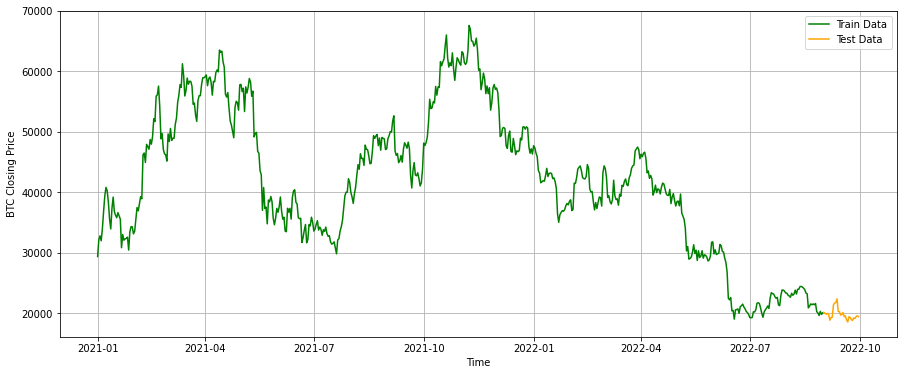

In [18]:
# Plot Train and Test data

plt.figure(figsize=(15,6))
plt.grid()
plt.xlabel('Time')
plt.ylabel('BTC Closing Price')
plt.plot(training_data, 'green', label = 'Train Data')
plt.plot(testing_data, 'orange', label = 'Test Data')
plt.legend()

### Model Building, Prediction and Evaluation

In [19]:
## Auto Arima Model to get the best p,d,q values

from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

stepwise_fit = auto_arima(bitcoin_data['Close'], trace = True, suppress_warnings = True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=11236.884, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11229.329, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11231.341, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=11231.337, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=11227.389, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=11233.332, Time=0.06 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.418 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  638
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -5612.694
Date:                Fri, 07 Oct 2022   AIC                          11227.389
Time:                        20:05:42   BIC                          11231.846
Sample:                    01-01-2021   HQIC                         11229.119
                         - 09-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.631e+06      1e+05     26.285      0.000    2.43e+06    2.83e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.80   Jarque-Bera (JB):               143.99
Prob(Q):                              0.37   Prob(JB):                         0.00
Heteroskedasticity (H):               0.26   Skew:                            -0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
## ARIMA Model building and prediction

model_predictions = []
n_test_obser = len(test_data)

from statsmodels.tsa.arima.model import ARIMA

for i in range(n_test_obser):
    model = ARIMA(train_data, order = (0,1,0)) ## Model order (0,1,0) is picked from stepwise_fit.summary()
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    actual_test_value = test_data[i]
    train_data.append(actual_test_value)

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  637
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -5604.379
Date:                Fri, 07 Oct 2022   AIC                          11210.758
Time:                        20:05:47   BIC                          11215.214
Sample:                             0   HQIC                         11212.488
                                - 637                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.635e+06      1e+05     26.239      0.000    2.44e+06    2.83e+06
Ljung-Box (L1) (Q):                   0.80   Jarque-Bera (JB):               142.76
Prob(Q):                              0.37   Pr

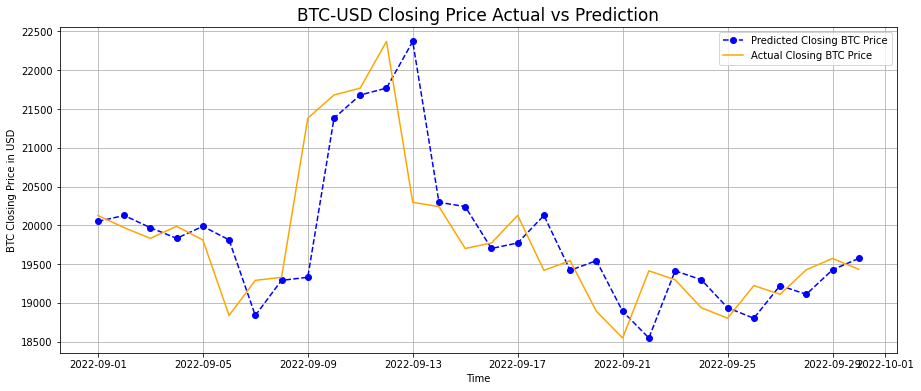

In [27]:
# Plot Actual Test Data vs Prediction Data

plt.figure(figsize=(15,6))
plt.grid(True)

date_range = bitcoin_data[-30:].index

plt.plot(date_range, model_predictions, color = 'blue', marker ='o', linestyle = 'dashed', label = 'Predicted Closing BTC Price')
plt.plot(date_range, test_data, color = 'orange', label = 'Actual Closing BTC Price')
plt.title('BTC-USD Closing Price Actual vs Prediction', fontsize = 17)
plt.xlabel('Time')
plt.ylabel('BTC Closing Price in USD')                                     
plt.legend()
plt.show()      

### Model Evaluation

In [23]:
## RMSE for 30 days test data (Sept 2022)

from math import sqrt
rmse = sqrt(mean_squared_error(model_predictions,test_data))
print('RMSE for 30 days:', rmse)

RMSE for 30 days: 657.2113051572843


In [26]:
## RMSE for 1 day Sept 30, 2022

rmse = sqrt(mean_squared_error(model_predictions[-1:],test_data[-1:]))
print('RMSE for 1 day:', rmse)
print(test_data[-1:], model_predictions[-1:])

RMSE for 1 day: 141.26171875
[19431.7890625] [19573.05078125]
